In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [5]:
G=nx.Graph()
G.add_edges_from([
    (0,1),
    (0,2),
    (1,2),
    (2,3)
])

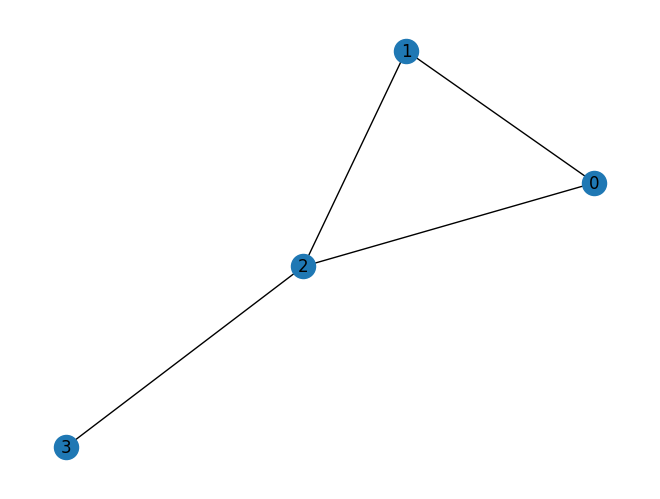

In [9]:
nx.draw(G,with_labels=True)

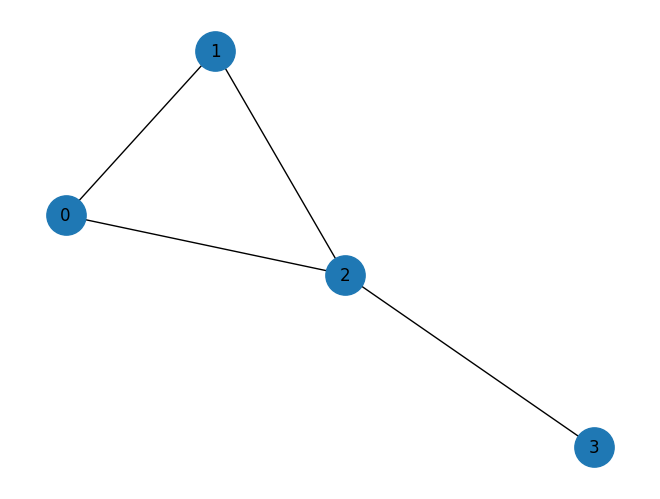

In [11]:
pos=nx.spring_layout(G)
nx.draw(G,pos, with_labels=True,node_size=800)
plt.show()

In [13]:

for node in G.nodes():
    G.nodes[node]['h']={
        "T":np.random.rand(),
        "I":np.random.rand(),
        "F":np.random.rand(),
    }

In [20]:
G.nodes[1]["h"]["T"]

0.06011194605630099

Understand NGNN Message Passing

In [21]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [38]:
def ngnn_update(G,W_T=1.0,W_I=2.0,W_F=1.0):
    new_embeddings={}
    for node in G.nodes():
        if "h" not in G.nodes[node]:
            raise ValueError(f"Node {node} has no 'h' features")

        neighbors=list(G.neighbors(node))
        T_sum, I_sum, F_sum = 0.0, 0.0, 0.0

        for n in neighbors:
            T_sum+=G.nodes[n]['h']['T']
            I_sum+=G.nodes[n]['h']['I']
            F_sum+=G.nodes[n]['h']['F']

    ##self values of the given node
    T_i=G.nodes[node]["h"]['T']
    I_i=G.nodes[node]["h"]['I']
    F_i=G.nodes[node]["h"]['F']

    # NGNN update equations
    T_new = sigmoid(W_T * T_i + T_sum)
    I_new = sigmoid(W_I * I_i + I_sum)
    F_new = sigmoid(W_F * F_i + F_sum)

    new_embeddings[node] = {
            "T": T_new,
            "I": I_new,
            "F": F_new
        }
    
    for node in new_embeddings:
        G.nodes[node]["h"]=new_embeddings[node]


In [ ]:
for layer in range(5):
    ngnn_update(G)
    print(f"\nAfter layer {layer+1}")
    for node in G.nodes():
        h=G.nodes[node]['h']
        print(f"Node {node} → T={h['T']:.3f}, I={h['I']:.3f}, F={h['F']:.3f}")


After layer 1
Node 0 → T=0.702, I=0.613, F=0.678
Node 1 → T=0.060, I=0.150, F=0.726
Node 2 → T=0.724, I=0.360, F=0.696
Node 3 → T=0.825, I=0.895, F=0.820

After layer 2
Node 0 → T=0.702, I=0.613, F=0.678
Node 1 → T=0.060, I=0.150, F=0.726
Node 2 → T=0.724, I=0.360, F=0.696
Node 3 → T=0.825, I=0.896, F=0.820

After layer 3
Node 0 → T=0.702, I=0.613, F=0.678
Node 1 → T=0.060, I=0.150, F=0.726
Node 2 → T=0.724, I=0.360, F=0.696
Node 3 → T=0.825, I=0.896, F=0.820

After layer 4
Node 0 → T=0.702, I=0.613, F=0.678
Node 1 → T=0.060, I=0.150, F=0.726
Node 2 → T=0.724, I=0.360, F=0.696
Node 3 → T=0.825, I=0.896, F=0.820

After layer 5
Node 0 → T=0.702, I=0.613, F=0.678
Node 1 → T=0.060, I=0.150, F=0.726
Node 2 → T=0.724, I=0.360, F=0.696
Node 3 → T=0.825, I=0.896, F=0.820
